In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 18.8 MB/s eta 0:00:00


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained("fhswf/TrOCR_Math_handwritten")

import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# Load the YOLO model
yolo_model = YOLO("/content/drive/MyDrive/Colab Notebooks/MS Thesis/Pipelines/Weights/Yolo/best.pt")

if yolo_model is None:
    raise ValueError("The model is not loaded. Please initialize your model before using it.")

# Initialize the TrOCR model
TrOCR_model = VisionEncoderDecoderModel.from_pretrained("fhswf/TrOCR_Math_handwritten")


# Move the model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TrOCR_model.to(device)

print("Model loaded and moved to device:", device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/MS Thesis/Pipelines/Weights/Yolo/best.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.6s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers":

generation_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

Model loaded and moved to device: cuda



0: 640x480 9 Class_1s, 78.9ms
Speed: 6.1ms preprocess, 78.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)


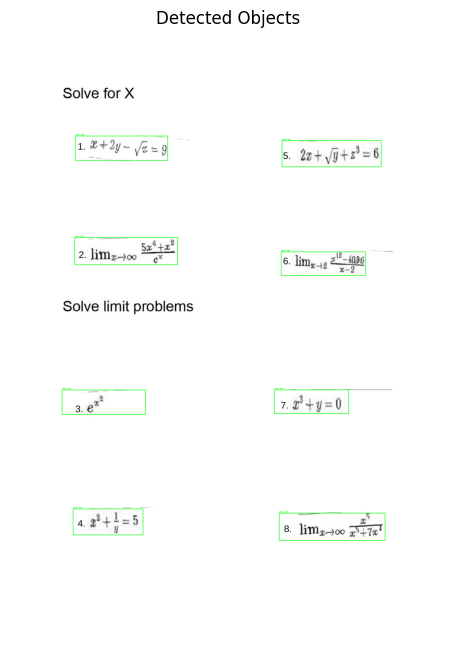

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def detect_and_display_objects(img, model, conf_threshold=0.50, iou_threshold=0.5):
    # Check if the input is a valid PIL Image
    if not isinstance(img, Image.Image):
        raise ValueError("The input image is not a valid PIL Image.")

    # Convert PIL image to NumPy array (OpenCV format)
    img = np.array(img)

    # Check if the image is loaded correctly
    if img is None:
        raise ValueError("The image could not be loaded. Please check the image path.")

    # Convert the image from BGR to RGB (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_rgb)  # Ensure this matches your model's inference API

    # Prepare for NMS
    boxes = []
    confidences = []
    class_ids = []

    # Extract bounding boxes, confidences, and class indices
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = box.conf[0]  # Confidence score
            cls = int(box.cls[0])  # Class index

            if conf > conf_threshold:
                boxes.append([x1, y1, x2, y2])
                confidences.append(float(conf))  # Convert to Python float
                class_ids.append(cls)

    # Apply NMS
    indices = cv2.dnn.NMSBoxes(
        bboxes=boxes,
        scores=confidences,
        score_threshold=conf_threshold,
        nms_threshold=iou_threshold,
    )

    # Draw bounding boxes and labels on the image
    for i in indices.flatten():
        x1, y1, x2, y2 = boxes[i]
        conf = confidences[i]
        cls = class_ids[i]

        label = f"{model.names[cls]} {conf:.2f}"
        # Draw bounding box and label
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 5)  # Green rectangle
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR back to RGB for display
    plt.axis('off')
    plt.title("Detected Objects")
    plt.show()

# Example usage (ensure you replace `model` and `img_path` with actual values):
# from your_model_library import YourModel
# model = YourModel()
img_path = "/content/drive/MyDrive/Colab Notebooks/MS Thesis/Pipelines/Testing_Dataset/generated_template_1.jpeg"
img = Image.open(img_path)
detect_and_display_objects(img, yolo_model)


In [ ]:
import cv2
import numpy as np
from PIL import Image

def detect_objects(img, model, conf_threshold=0.50, iou_threshold=0.5):
    # Check if the input is a valid PIL Image
    if not isinstance(img, Image.Image):
        raise ValueError("The input image is not a valid PIL Image.")

    # Convert PIL image to NumPy array (OpenCV format)
    img = np.array(img)

    # Check if the image is loaded correctly
    if img is None:
        raise ValueError("The image could not be loaded. Please check the image path.")

    cropped_images = []  # List to store the cropped image patches along with coordinates

    # Convert the image from BGR to RGB (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_rgb)  # Ensure this matches your model's inference API

    # Prepare for NMS
    boxes = []
    confidences = []
    class_ids = []

    # Extract bounding boxes, confidences, and class indices
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = box.conf[0]  # Confidence score
            cls = int(box.cls[0])  # Class index

            if conf > conf_threshold:
                boxes.append([x1, y1, x2, y2])
                confidences.append(float(conf))  # Convert to Python float
                class_ids.append(cls)

    # Apply NMS
    indices = cv2.dnn.NMSBoxes(
        bboxes=boxes,
        scores=confidences,
        score_threshold=conf_threshold,
        nms_threshold=iou_threshold,
    )

    # Keep only boxes after NMS
    for i in indices.flatten():
        x1, y1, x2, y2 = boxes[i]
        conf = confidences[i]
        cls = class_ids[i]

        label = f"{model.names[cls]} {conf:.2f}"
        # Draw bounding box and label
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green rectangle

        # Crop the image patch from the bounding box
        cropped_img = img[y1:y2, x1:x2]

        # Append the cropped image patch along with coordinates to the list
        cropped_images.append((cropped_img, (x1, y1, x2, y2)))

    # Sort the cropped images based on the specified rules
    cropped_images.sort(key=lambda item: (item[1][0] < 1000, item[1][1] if item[1][0] < 1000 else item[1][3]))

    # Extract just the image patches from the sorted list
    sorted_cropped_images = [item[0] for item in cropped_images]

    # Return the sorted list of cropped image patches
    return sorted_cropped_images

# Example usage (ensure you replace `model` and `img_path` with actual values):
# from your_model_library import YourModel
# model = YourModel()
# img_path = "path_to_image.jpg"
# img = Image.open(img_path)
# detected_images = detect_objects(img, model)

In [ ]:
def TrOCR_Inference(model, processor, image):
  pixel_values = processor(image, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)
  #print(pixel_values.shape)

  generated_ids = model.generate(pixel_values)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  return generated_text

# For Mathsolver

In [ ]:
%%capture
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

In [ ]:
import re
import ast

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 200 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
          # Llama-3.1 15 trillion tokens model 2x faster!
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2024.12.4: Fast Llama patching. Transformers:4.46.3.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 7.5. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

Unsloth 2024.12.4 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
# # Function to replace variables in the equation
# def insert_values(equation, variables):
#     def replacer(match):
#         var = match.group(0)  # Get the variable name from the match
#         return str(variables.get(var, var))  # Replace with value or leave as is

#     # Use regex to find variable names and replace them
#     substituted_equation = re.sub(r'\b[a-zA-Z_][a-zA-Z_0-9]*\b', replacer, equation)
#     return substituted_equation

import re

def insert_values(equation, variables):
    def replacer(match):
        var = match.group(0)  # Get the variable name from the match
        return str(variables.get(var, var))  # Replace with value or leave as is

    if equation.startswith("\\lim"):  # Check if the equation starts with lim
        # Extract the variable and its value from the lim expression
        lim_match = re.match(r"\\lim_\(.*?to\s*([^\)]+)\)\s*(.+)", equation)
        if lim_match:
            lim_value = lim_match.group(1).strip()  # Extract the value after 'to'
            expr = lim_match.group(2).strip()      # Extract the expression
            # Replace variable in the expression with its limit value
            expr_with_value = re.sub(r'\b[a-zA-Z_][a-zA-Z_0-9]*\b', replacer, expr)
            return expr_with_value  # Return the modified expression
        else:
            raise ValueError("Invalid lim format")
    else:
        # Use regex to find variable names and replace them
        substituted_equation = re.sub(r'\b[a-zA-Z_][a-zA-Z_0-9]*\b', replacer, equation)
        return substituted_equation

In [ ]:
def Cleaning_equation(input_string):

    characters_to_remove = ['\\', ',', '.']
    replacements = {'{': '(', '}': ')'}

    # Remove unwanted characters
    for char in characters_to_remove:
        input_string = input_string.replace(char, '')

    # Replace '{' with '(' and '}' with ')'
    for old_char, new_char in replacements.items():
        input_string = input_string.replace(old_char, new_char)

    return input_string

def parse_query_variables(query):
    pattern = r'(\w+)\s*=\s*(-?\d+(?:\.\d+)?)'

    # Find all matches in the query
    matches = re.findall(pattern, query)

    # Convert matches to dictionary with numeric values
    query_variables = {
        var: float(val) if '.' in val else int(val)
        for var, val in matches
    }

    return query_variables



In [ ]:
import ast

In [ ]:
import re
from sympy import symbols, Eq, solve, limit, sin, cos, tan, cosh, sqrt, E

# Define commonly used symbols
x, y, z, l, alpha, tp, d, p, t, o, U = symbols('x y z l alpha tp d p t o U')
# Lowercase alphabets
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z = symbols('a b c d e f g h i j k l m n o p q r s t u v w x y z')

# Uppercase alphabets
A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z = symbols('A B C D E F G H I J K L M N O P Q R S T U V W X Y Z')

def preprocess_equation(equation: str) -> str:
    """
    Preprocesses and cleans the input equation for solving.
    """
    # Replace `sqrt` with `sqrt()` (ensure function call)
    equation = re.sub(r'sqrt\((.*?)\)', r'sqrt(\1)', equation)

    # Replace implicit multiplication using parentheses, e.g., (2)(y) -> 2*y
    equation = re.sub(r'\(([^()]+)\)\(([^()]+)\)', r'\1*\2', equation)

    # Replace implicit multiplication before parentheses, e.g., 2(3) -> 2*3
    equation = re.sub(r'(\d)\(', r'\1*(', equation)
    equation = re.sub(r'\)(\d)', r')*\1', equation)

    # Handle implicit multiplication involving functions and variables, e.g., sqrt(2)(4^2)(4) -> sqrt(2)*4**2*4
    equation = re.sub(r'sqrt\((\d+)\)([a-zA-Z(])', r'sqrt(\1)*\2', equation)

    # Handle implicit multiplication involving variables, e.g., (2)(sqrt(3))U -> (2)*(sqrt(3))*U
    equation = re.sub(r'\)\s*([a-zA-Z])', r')*\1', equation)

    # Handle fraction-like expressions, e.g., `frac(...)` -> `(...)`
    equation = equation.replace('frac', '')

    # Handle `lim_(x to ...)` syntax to convert to `limit(...)`
    equation = re.sub(r'lim_\((.*?) to (.*?)\)', r'limit(', equation)

    # Replace `^` with `**` for exponentiation
    equation = equation.replace('^', '**')

    # Replace missing multiplication in complex expressions, e.g., `2sqrt(7)` -> `2*sqrt(7)`
    equation = re.sub(r'(\d)([a-zA-Z(])', r'\1*\2', equation)

    # Ensure proper grouping for division
    equation = re.sub(r'\((.*?)\)/\((.*?)\)', r'(\1)/(\2)', equation)

    # Ensure that `e` is treated as a constant symbol, not a numerical value
    equation = equation.replace('e', 'E')

    return equation


def solve_equations(equations: list):
    """
    Processes and solves a list of equations.
    """
    results = []
    for eq in equations:
        try:
            # Preprocess the equation
            cleaned_eq = preprocess_equation(eq)

            # Split into left-hand side and right-hand side for solving
            if '=' in cleaned_eq:
                lhs, rhs = cleaned_eq.split('=')
                lhs = eval(lhs)
                rhs = eval(rhs)
                solution = solve(Eq(lhs, rhs))
            else:
                # If there's no '=', treat it as an expression to simplify
                solution = eval(cleaned_eq)

            # Convert symbolic results to numerical approximations where possible
            if isinstance(solution, (list, tuple)):
                solution = [s.evalf() if hasattr(s, 'evalf') else s for s in solution]
            else:
                solution = solution.evalf() if hasattr(solution, 'evalf') else solution

            results.append((eq, solution))
        except Exception as ex:
            results.append((eq, f"Error: {ex}"))

    return results

# Example equations
equations = [
    'l = (1)/((4)*(3.14))*((23)*(89)*(6)*(23))',
    'x + (2)(2) - sqrt(16) = 9',
    '4^3 + sqrt(29) = z',
    '(sin((14)(5)))/(5)',  # Will result in an error (division by zero)
    '(5)(5^2 + 5)/(5^2 + 1)',
    '(tan(45)*(25))',
    'e = - (29 + 2)/(29)',
    '(1)/(4(3.14))23(89)(6)(23)',
    'sin(45) = - ((2)(7))/((k)(1))',
    'alpha = sqrt((1 + 0.5)/(2 - 0.5))',
    '3 = (2)*(sqrt(3))*U',
    '7^2 + (3)(0) + z = 6',
    'tp = (cosh(v))*(9)',
    '2e^(-sqrt(7))',
    'e^((9^2) + (2)(8)) + (2)(8)',
    'z = (7)(2)/(2)',
    'e = sqrt(6.3/8.2)',
    '((9^5))/(9^5 + (7)(9^2))',
    'e = - (29 + 2)/(29)',
    '2 = ((e^2))/(2p^2)',
    '20 = ((20)(89))/(2)',
    '-((2)(2))/(90) + 22',
    '- sqrt(2)*(4^2)*(4)',
    'r = ((sqrt(4)*(3.14)))/(20)(4)'
]

# Solve the equations
solutions = solve_equations(equations)

# Display the results
for original, result in solutions:
    print(f"Original: {original}")
    print(f"Result: {result}\n")


Original: l = (1)/((4)*(3.14))*((23)*(89)*(6)*(23))
Result: [22490.9235668790]

Original: x + (2)(2) - sqrt(16) = 9
Result: [9.00000000000000]

Original: 4^3 + sqrt(29) = z
Result: [69.3851648071345]

Original: (sin((14)(5)))/(5)
Result: 0.154778136311578

Original: (5)(5^2 + 5)/(5^2 + 1)
Result: 125.1923076923077

Original: (tan(45)*(25))
Result: 40.4943797635965

Original: e = - (29 + 2)/(29)
Result: [-1.06896551724138]

Original: (1)/(4(3.14))23(89)(6)(23)
Result: 26248.56687898089

Original: sin(45) = - ((2)(7))/((k)(1))
Result: [-16.4530990839005]

Original: alpha = sqrt((1 + 0.5)/(2 - 0.5))
Result: [1.00000000000000]

Original: 3 = (2)*(sqrt(3))*U
Result: [0.866025403784439]

Original: 7^2 + (3)(0) + z = 6
Result: [-43.0000000000000]

Original: tp = (cosh(v))*(9)
Result: [{tp: 9*cosh(v)}]

Original: 2e^(-sqrt(7))
Result: 2.0/E**2.64575131106459

Original: e^((9^2) + (2)(8)) + (2)(8)
Result: E**97 + 16.0

Original: z = (7)(2)/(2)
Result: [7.00000000000000]

Original: e = sqrt(6.3/

In [ ]:
ConvertEquationPrompt = """
### Role:
You are a simple math assitant that convert latex equation to simple math equaiton. and convert words in query to latters.
### Instruction:
- You will be given a query and equations.
  - Query: a string representing question
  - Equation: an string representing equation in latex

- Rules:
1. always replace pi, PI, Pi, pI with (3.14)
2. convert all words into their first letter in small only if they are not math functions like sqrt, ln, log, sin, cos, tan,.....
3. any latex term must be converted to accord o latex like lparen to (

- Solution:
  - Provide Math equation

### Examples:
- Query: Find q given a = 3, b = 9
- Equation: q = frac(a^2 + b)(2)
- Solution: ['Find q given a = 3, b = 9', 'q = (a^2 + b)/(2)']

- Query: Apply limit
- Equation: lim_(mega to 6) frac(sin(3mega))(mega + 2)
- Solution: ['Apply limit', '(sin((3)*(6)))/(6 + 2)']

- Query: Find value of tilde (Psi) given Psi = 8, V = 45
- Equation: tilde ( Psi ) = lparen cosh V rparen Psi
- Solution: ['Find value of tp given p = 8,  = 45','tp = (cosh(v))*(p)']

- Query: Find lamda if i = 2, rho = 7 and zeta = 1
- Equation: tanh lambda = - frac ( i rho ) ( 2 zeta )
- Solution: ['Find l if i = 2, r = 7 and z = 1','tanh(l) = - ((i)*(r))/((2)*(z))']

- Query: Solve with W _ ( 4 ) = 2, W _ ( 5 ) = 9
- Equation: 3 W _ ( 4 ) + 2 W _ ( 5 )
- Solution: ['Solve with w4 = 2, w5 = 9','(3)(w4) + (2)(w5)']

- Query: Solve for r given p = 9, k = 16
- Equation: r^2 - p + sqrt(k) = 15
- Solution: r^2 - p + sqrt(k) = 15

- Query: Apply limit
- Equation: lim_(y to 3) frac(tan(4y))(y + 1)
- Solution: ['Apply limit', '(tan((4)*(3)))/(3 + 1)']

- Query: Solve using limit
- Equation: lim_(t to infty) frac(7t - 2)(t^2 + 3)
- Solution: ['Solve using limit', '((7)*(infty) - 2)/(infty^2 + 3)']

- Query: Find log
- Equation: ln(t^3 - 5t + 1)
- Solution: ['Find log', 'ln(t^3 - (5)*(t) + 1)']

- Query: Evaluate for zeta given omega = 22, tau = 7
- Equation: zeta = frac(omega tau^2)(4)
- Solution: ['Evaluate for z given o = 22, t = 7','z = ((o)*(t^2))/(4)']

- Query: Provide solution or gamma given bhi = 7, beta = 2
- Equation: gamma = frac(phi beta)(sqrt(5))
- Solution: ['Provide solution or gamma given bhi = 7, beta = 2', 'g = ((p)*(b))/(sqrt(5))']

- Query: Find epsilon given delta = 7
- Equation: epsilon = - frac(Delta - 20)(Delta + 4)
- Solution: ['Find e given d = 7','e = - (d)/(d + 4)']

- Query: Find Umb
- Equation: Umb = log_(10) x^5 + 2 + tan(25)(35)
- Solution: ['Find u', 'u = log_(10) x^5 + 2 + tan(25)*35']

- Query: Solve for Psi
- Equation: Psi = 2sqrt(4Pi + 3)
- Solution: ['Solve for p', 'p = (2)(sqrt((4)*(3.14) + 3))']



### Input:
Query: {query}
Equation: {equation}

### Output:
"""


In [ ]:
def format_prompt_Latex2Math(query, equation):

    # Format the full prompt
    return ConvertEquationPrompt.format(
        equation = equation,
        query = query
    )

def Latex2Math(query, equation):

  formatted_prompt = format_prompt_Latex2Math(query, equation)


  FastLanguageModel.for_inference(model)

  inputs = tokenizer([formatted_prompt], return_tensors="pt").to("cuda")

  # Generate the output from the model
  outputs = model.generate(**inputs, max_new_tokens=80, use_cache=True)

  # Decode the generated tokens and extract the first element from the list
  decoded_output = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

  # Ensure each explained step is on a new line
  #formatted_output = decoded_output.replace(". ", ".\n")

  #input_content, output_content, explanation_content = extract_first_input_output_explanation(formatted_output)

  return decoded_output


def extractoutput_Latex2Math(text):
    # Define the regular expression patterns to capture the input and output
    #input_pattern = r'### Input:\n(.*)\n'
    output_pattern = r'### Output:\n(.*)\n'

    # Find the first input and its corresponding output
    #input_match = re.search(input_pattern, text)
    output_match = re.search(output_pattern, text)

    #if input_match and output_match:
    if output_match:
        #input_value = input_match.group(1).strip()
        output_value = output_match.group(1).strip()
        return output_value
    else:
        return  None


In [ ]:
def process_equation1(input_list):
    """
    This function processes a list of mathematical equation strings by:
    1. Removing the leading number and period (e.g., '5.').
    2. Removing occurrences of 'r_{}', 'r_{', or 'r_{.' from the strings.

    Parameters:
        input_list (list): A list of strings representing mathematical equations.

    Returns:
        list: A list of processed strings with specified patterns removed.
    """
    processed_list = []

    for equation in input_list:
        # Remove leading number and period if present
        processed_equation = equation.lstrip('0123456789.')

        # Remove 'r_{}', 'r_{', or 'r_{.' patterns
        processed_equation = processed_equation.replace('r_{}', '')
        processed_equation = processed_equation.replace('r_{.}', '')
        processed_equation = processed_equation.replace('r_{', '')

        # Append the cleaned equation to the processed list
        processed_list.append(processed_equation)

    return processed_list

# Example usage
input_list = [
    '5.x+y+z^{2}=7',
    '6.ln(x-2y)',
    'r_{.}ln(2y)',
    'r_{.ln(2y)}',
    '8.lim_{x\rightarrow7}\frac{sin(9x)}{x}',
    '1.lim_{x\rightarrow1}\frac{x^{\prime\prime}-1}{x-1}',
    '2e^{-3\sqrt{x}}',
    '3.3x^{2}+y+2z=0',
    '4.3x+2y+z=6'
]

processed_list = process_equation1(input_list)
print(processed_list)

['x+y+z^{2}=7', 'ln(x-2y)', 'ln(2y)', '.ln(2y)}', 'lim_{x\rightarrow7}\x0crac{sin(9x)}{x}', 'lim_{x\rightarrow1}\x0crac{x^{\\prime\\prime}-1}{x-1}', 'e^{-3\\sqrt{x}}', 'x^{2}+y+2z=0', 'x+2y+z=6']


In [ ]:
# Example data
from sympy import E, N
import re

data = [('4e^((3) + 3)', 4.0/E**6)]
from sympy import sympify

# Data to process
data = [('4e^((3) + 3)', '4.0')]

# Function to convert the second element of each tuple to a symbolic expression
def convert_to_symbolic(data):
    processed_data = []
    for item in data:
        # Replace '/' with '*' in the second element
        symbolic_expr = sympify(item[1].replace('/', '*'))
        processed_data.append((item[0], symbolic_expr))
    return processed_data

from sympy import sympify, N

# Function to evaluate expressions
def Evaluate_Exp(data):
    # Iterate through the list of tuples
    for equation, result in data:
        result = str(result)  # Ensure result is treated as a string
        # Check if the second element is a list
        if isinstance(result, list):
            # If it's a list and the first element is a float or int, return it directly
            if result and isinstance(result[0], (float, int)):
                return result
            else:
                return result  # Return the list as-is if not convertible to float or int
        else:
            # Attempt to convert the expression to symbolic form
            try:
                symbolic_data = convert_to_symbolic([(equation, result)])
                for eq, r in symbolic_data:
                    print("Symbolic Representation:", r)
                    evaluated_value = N(r)  # Numerically evaluate the symbolic expression
                    print("Evaluated Value:", evaluated_value)
                    return evaluated_value
            except Exception as e:
                return result

# Example usage
data = [('4e^((3) + 3)', 4.0/E**6)]

# def convert_to_symbolic(data):
#     from sympy import sympify
#     processed_data = []
#     for item in data:
#         symbolic_expr = sympify(item[1].replace('/', '*'))
#         processed_data.append((item[0], symbolic_expr))
#     return processed_data

result = Evaluate_Exp(data)
print("Final Output:", result)



Symbolic Representation: 4.0*exp(-6)
Evaluated Value: 0.00991500870666543
Final Output: 0.00991500870666543


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def remove_similar_samples(input_list, threshold=0.8):
    """
    Removes the most similar samples from the list if its length exceeds 8.

    Parameters:
        input_list (list): A list of strings to be processed.
        threshold (float): Similarity threshold to consider for removal. Default is 0.8.

    Returns:
        list: A list with the most similar samples removed.
    """
    if len(input_list) <= 8:
        return input_list

    # Compute TF-IDF vectors for all elements in the list
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(input_list)

    # Compute cosine similarity between all pairs
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Track indices of elements to remove
    to_remove = set()

    # Iterate over the upper triangle of the similarity matrix
    for i in range(len(input_list)):
        for j in range(i + 1, len(input_list)):
            if similarity_matrix[i, j] > threshold:
                # Mark one of the most similar samples for removal
                to_remove.add(j)

    # Create a new list excluding marked indices
    filtered_list = [sample for idx, sample in enumerate(input_list) if idx not in to_remove]

    # If still more than 8 elements, truncate to 8
    while len(filtered_list) > 8:
        filtered_list.pop()

    return filtered_list

# Example usage
list_A = [
    "sample1",
    "sample2",
    "sample3",
    "sample4",
    "sample5",
    "sample6",
    "sample7",
    "sample8",
    "sample9",
    "sample10",
]

filtered_list = remove_similar_samples(list_A)
print("Filtered list:", filtered_list)


Filtered list: ['sample1', 'sample2', 'sample3', 'sample4', 'sample5', 'sample6', 'sample7', 'sample8']


In [ ]:
def Cleaning_equation(input_string):
    characters_to_remove = ['\\', ',', '.']
    replacements = {'{': '(', '}': ')'}

    # Remove unwanted characters
    for char in characters_to_remove:
        input_string = input_string.replace(char, '')

    # Replace '{' with '(' and '}' with ')'
    for old_char, new_char in replacements.items():
        input_string = input_string.replace(old_char, new_char)

    # Remove the overline command
    input_string = input_string.replace('overline', '')
    input_string = input_string.replace('\overline', '')

    return input_string


# Inference

In [ ]:
from PIL import Image

imag_path = '/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/MS Thesis/Pipelines/Subset/generated_template_1.jpg'
query = 'Solve for x given y = 2 and z = 9'
equation_number = 1
image = Image.open(imag_path)

resultss = []

from PIL import Image
Image_path = '/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/MS Thesis/Pipelines/Subset/generated_template_1.jpg'
img = Image.open(Image_path)

Image_patch_list = detect_objects(img, yolo_model)
equation_list = []
for i in Image_patch_list:
  OCR = TrOCR_Inference(TrOCR_model, processor, i)
  equation_list.append(OCR)

print(equation_list)
equation_list = process_equation1(equation_list)
print(equation_list)
selected_equation = str(equation_list[equation_number])
query = 'Find x given y = 4 and z = 2'
equation = Cleaning_equation(selected_equation)
print(query)
print(equation)

Math_format = Latex2Math(query, equation)
LLM_output = extractoutput_Latex2Math(Math_format)
print('LLM output', LLM_output)

LLM_list = ast.literal_eval(LLM_output)

# Extract the query and equation
LLM_query = LLM_list[0]   # The first element
LLM_equation = LLM_list[1]  # The second element

# Output the results
print("LLM_query:", LLM_query)
print("LLM_equation:", LLM_equation)

LLM_query = str(LLM_query)
LLM_equation = str(LLM_equation)

query_variables = parse_query_variables(LLM_query)
print("Extracted Variables:", query_variables)
# Substitute values into the equation
exprr = insert_values(LLM_equation, query_variables)
print(exprr)
exp_list = [str(exprr)]

result = solve_equations(exp_list)
print("Solved result:", result)
resultss.append(exprr)


0: 640x480 9 Class_1s, 68.3ms
Speed: 4.2ms preprocess, 68.3ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 480)
['x+2y-\\sqrt{z}=9', '2x+\\sqrt{y}+z^{3}=6', 'lim_{x\\rightarrow\\infty}\\frac{5x^{4}+x^{2}}{e^{x}}', 'lim_{x+2}\\frac{x^{12}-1096}{x-2}', 'x^{3}+y=0', 'e^{x^{i^{\\cdot^{\\cdot^{\\cdot}}}}}', 'x^{2}+\\frac{1}{y}=5', 'lim_{x\\rightarrow\\infty}\\frac{x^{3}}{x^{5}+7x^{3}}']


NameError: name 'process_equation1' is not defined

In [ ]:
queries_dict = {
    1: [
        "Find x given y = 2 and z = 4 in equation 1",
        "Find x given y = 2 in equation 4",
    ],
    2: [
        "Solve equation 2 given x = 9"
    ],
    5: [
        "Evaluate for z in equation 7 Given x = 2, y = 4",
        "Evaluate for x = 3 in equation 5"
    ],
    6: [
        "Find x, given z = 2, y = 6 in equation 5",
        "In equation 7 find y when x = 9 and z = 16"
    ],
    7: [
        "Find z as x = 2 and y = 2 in equation 7",
        "Solve when x = 2 in equation 6"
    ],
    18: [
        "Solve equation 1",
        "Solve equation 7"
    ],
    45: ["Find e given delta = 2 in equation 1"],
    54: [
        "Find L a = 2, k = 5, pi = 3.14, d = 3 in equation 2",
        "Find z when omega = 2 and tau = 6 in equation 3",
        "Solve for y = 3 in equation 5"
    ],
    63: [
        "Find Phi for y = 7, k = 6 and const = 2 in equation 1",
        "Find alpha when z = 2 in equation 2"
    ],
    72: ["Find r given k = 4 and beta = 22 in equation 8"],
    116: [
        "Solve for n = 2, p = 4 in equation 6",
        "Find alpha given v = 4 from equation 8"
    ],
    129: ["Evaluate for Phi given that u = 7 in equation 3"],
    200: [
        "In equation 3 find tilde Psi given v = 3 and Psi = 2",
        "Solve equation 4 for z = 8"
    ],
    233: [
        "Evaluate equation 2 for x = 2",
        "Evaluate equation 4 for x = 4, y = -3"
    ],
    1118: [
        "Solve for z given y = 2 and x = 2 in equation 1",
        "Find eta in equation 8 Given L = 6, N = 8"
    ]
}


In [ ]:
import os
from PIL import Image

folder_path = '/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/MS Thesis/Pipelines/Testing_Dataset/'

adjustment_mapping = {
    1: 4,
    2: 5,
    3: 6,
    4: 7,
    5: 0,
    6: 1,
    7: 2,
    8: 3
}



# Function to extract the equation number from the query
def extract_equation_number(query):
    # You need to define how to extract equation number from query
    # For example, extracting a number after the word "equation"
    return query.split('equation')[1].split()[0]  # Example logic, adjust as needed

# Loop through images in the folder
image_files = []

# Collect all image files
for filename in os.listdir(folder_path):
    if filename.startswith("generated_template_") and filename.endswith(".jpeg"):
        try:
            # Extract the key (the number after 'generated_template_')
            key = int(filename.split("_")[-1].split(".")[0])
            image_files.append((key, filename))
        except ValueError:
            continue

# Sort the image files by the extracted key
image_files.sort(key=lambda x: x[0])  # Sort by the first item in the tuple (the key)

# Loop through sorted image files
for key, filename in image_files:
    file_path = os.path.join(folder_path, filename)

    # Print the image path and corresponding queries
    if key in queries_dict:
        print(f"Image Path: {file_path}")
        for query in queries_dict[key]:
            print(f"Query: {query}")

            # Extract the equation number from the query
            equation_number = extract_equation_number(query)
            print(f"Equation number (original): {equation_number}")

            # Get the adjusted number using the mapping
            equation_number = adjustment_mapping.get(int(equation_number), None)
            equation_number = equation_number



            #equation_number = int(equation_number) - 1  # Adjust the index
            print(f"Adjusted equation number: {equation_number}")
            print('     ')

            # Image processing and inference
            image = Image.open(file_path)
            output = detect_objects(image, yolo_model)
            print(len(output))
            equation_list = []
            for i in output:
                #plt.imshow(i)
                OCR = TrOCR_Inference(TrOCR_model, processor, i)
                #print(OCR)
                equation_list.append(OCR)
            print(equation_list)

            # output = donut_inference(image)  # Run your inference model here
            # equation_list = extract_latex_equations(output)
            equation_list = process_equation1(equation_list)
            print(f"Extracted equations: {equation_list}")

            selected_equation = str(equation_list[equation_number])
            equation = Cleaning_equation(selected_equation)


            print(f"Processed equation: {equation}")
            print("\n")

            Math_format = Latex2Math(query, equation)
            LLM_output = extractoutput_Latex2Math(Math_format)
            print('LLM output', LLM_output)

            LLM_list = ast.literal_eval(LLM_output)

            # Extract the query and equation
            LLM_query = LLM_list[0]   # The first element
            LLM_equation = LLM_list[1]  # The second element

            # Output the results
            print("LLM_query:", LLM_query)
            print("LLM_equation:", LLM_equation)

            LLM_query = str(LLM_query)
            LLM_equation = str(LLM_equation)

            query_variables = parse_query_variables(LLM_query)
            print("Extracted Variables:", query_variables)
            # Substitute values into the equation
            exprr = insert_values(LLM_equation, query_variables)
            print(exprr)
            exp_list = [str(exprr)]

            result = solve_equations(exp_list)
            print("Solved result:", result)
            answer = Evaluate_Exp(result)
            print("Final Answer:", answer)
            print("-------------------------------------------")


Image Path: /content/drive/MyDrive/Colab Notebooks/Colab Notebooks/MS Thesis/Pipelines/Testing_Dataset/generated_template_1.jpeg
Query: Find x given y = 2 and z = 4 in equation 1
Equation number (original): 1
Adjusted equation number: 4
     

0: 640x480 9 Class_1s, 42.4ms
Speed: 20.1ms preprocess, 42.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)
8
['5.\\overline{2x}+\\sqrt{y}+z^{3}=6', '6.lim_{x-1}2^{\\frac{x^{12}-1096}{x-2}}', 'r_{.x^{3}+y=0', '8.\\overline{lim_{x\\rightarrow\\infty}\\frac{x^{5}}{x^{5}+7x}', '1.\\underline{x}+2y-\\sqrt{z}=9', '2.lim_{x\\rightarrow\\infty}\\frac{5x^{4}+x^{2}}{e^{x}}', '3.e^{x^{2}}', '4.x^{2}+\\frac{1}{y}=5']
Extracted equations: ['\\overline{2x}+\\sqrt{y}+z^{3}=6', 'lim_{x-1}2^{\\frac{x^{12}-1096}{x-2}}', '.x^{3}+y=0', '\\overline{lim_{x\\rightarrow\\infty}\\frac{x^{5}}{x^{5}+7x}', '\\underline{x}+2y-\\sqrt{z}=9', 'lim_{x\\rightarrow\\infty}\\frac{5x^{4}+x^{2}}{e^{x}}', 'e^{x^{2}}', 'x^{2}+\\frac{1}{y}=5']
Processed equation: un

<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?



0: 640x480 8 Class_1s, 19.8ms
Speed: 4.3ms preprocess, 19.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
8
['5...f<c_{i}', 'G.E^{2}\\equiv E_{i}E^{\\dagger}\\approx E_{j}', 'r_{.}\\Lambda\\approx\\frac{dI}{dG}G^{-}Y', '8.\\overline{X}=\\overline{X}^{\\dagger}\\overline{X}', '1.\\tau=q^{-1}p_{g_{i}}', '2.\\lfloor\\sim\\sqrt{-detG_{eff}}', '3.\\overline{\\Psi}=(cos\\overline{V})\\Psi_{1}', '4.2e^{-\\sqrt{z}^{-}}']
Extracted equations: ['f<c_{i}', 'G.E^{2}\\equiv E_{i}E^{\\dagger}\\approx E_{j}', '\\Lambda\\approx\\frac{dI}{dG}G^{-}Y', '\\overline{X}=\\overline{X}^{\\dagger}\\overline{X}', '\\tau=q^{-1}p_{g_{i}}', '\\lfloor\\sim\\sqrt{-detG_{eff}}', '\\overline{\\Psi}=(cos\\overline{V})\\Psi_{1}', 'e^{-\\sqrt{z}^{-}}']
Processed equation: (Psi)=(cos(V))Psi_(1)


LLM output ['In equation 3 find tp given v = 3 and p = 2', '(p) = (cos(v))*p_(1)']
LLM_query: In equation 3 find tp given v = 3 and p = 2
LLM_equation: (p) = (cos(v))*p_(1)
Extracted Variables: {'v': 3, 'p':

SyntaxError: unterminated string literal (detected at line 1) (<unknown>, line 1)


0: 640x480 8 Class_1s, 19.5ms
Speed: 2.0ms preprocess, 19.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
196 1024 414 1088
193 297 421 362
807 321 1018 384
789 1362 1035 1433
202 599 425 664
194 1355 419 1420
777 589 1001 656
803 1025 1033 1094


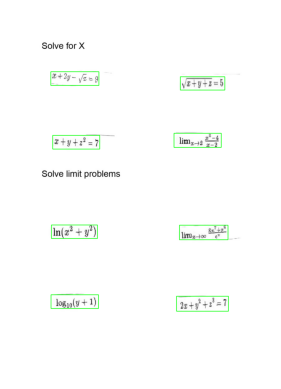

In [ ]:
# Placeholder for model loading (replace with your logic)
# Example for PyTorch-based models:
# from my_model_library import MyModel
# model = MyModel()
# model.load_state_dict(torch.load('path_to_model_weights.pth'))
# model.eval()


# # Load the YOLO model
# model = YOLO(r"E:\Abdul_Muqtadir\Thesis\Dataset\YoloV9_Results\train\weights\best.pt")

# if model is None:
#     raise ValueError("The model is not loaded. Please initialize your model before using it.")

# Define the detect_objects function
# def detect_objects(img, model, conf_threshold=0.25):

#     output_folder = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Patches"

#     cropped_images = []

#     # Load the image
#     img = img

#     if img is None:
#         raise FileNotFoundError(f"Image not found at path: {image_path}")

#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#     # Perform inference
#     results = model(img_rgb)  # Ensure this matches your model's inference API

#     # Draw bounding boxes on the image
#     for result in results:
#         for box in result.boxes:
#             x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
#             print(x1, y1, x2, y2)
#             conf = box.conf[0]  # Confidence score
#             cls = int(box.cls[0])  # Class index

#             if conf > conf_threshold:
#                 label = f"{model.names[cls]} {conf:.2f}"
#                 # Draw bounding box and label
#                 cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green rectangle
#                 #cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#                 cropped_img = img[y1:y2, x1:x2]
#                 cropped_images.append(cropped_img)  # Store cropped image

#                 # Save the cropped image to the output folder
#                 crop_filename = os.path.join(output_folder, f"crop_{x1}_{y1}_{x2}_{y2}.jpg")
#                 cv2.imwrite(crop_filename, cropped_img)


#     # Convert to RGB for display
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     return img_rgb


# import os

# # Folder containing images
# folder_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset/"

# # Supported image extensions
# image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# # Loop through the folder
# for filename in os.listdir(folder_path):
#     if filename.lower().endswith(image_extensions):
#         image_path = os.path.join(folder_path, filename)
#         output_image = detect_objects(img, model)

#         # Display the result
#         plt.imshow(output_image)
#         plt.axis('off')
#         plt.show()





# # Specify the image path
# image_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset\generated_template_16.jpg"

# img = cv2.imread(image_path)

# # Perform detection
# output_image = detect_objects(img, model)

# # Display the result
# plt.imshow(output_image)
# plt.axis('off')
# plt.show()


In [ ]:
import os

# Folder containing images
folder_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset/"

# Supported image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Loop through the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(image_extensions):
        image_path = os.path.join(folder_path, filename)
        output_image = detect_objects(img, model)

        # Display the result
        plt.imshow(output_image)
        plt.axis('off')
        plt.show()




In [ ]:
import cv2
import os
import matplotlib.pyplot as plt


# Load the YOLO model
model = YOLO(r"E:\Abdul_Muqtadir\Thesis\Dataset\YoloV9_Results\train\weights\best.pt")

if model is None:
    raise ValueError("The model is not loaded. Please initialize your model before using it.")

# Define the detect_objects function
def detect_objects(img, model, conf_threshold=0.75):
    #output_folder = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Patches"
    #os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist

    cropped_images = []

    if img is None:
        raise FileNotFoundError(f"Image not found.")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_rgb)  # Ensure this matches your model's inference API

    # Draw bounding boxes on the image
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            print(x1, y1, x2, y2)
            conf = box.conf[0]  # Confidence score
            cls = int(box.cls[0])  # Class index

            if conf > conf_threshold:
                label = f"{model.names[cls]} {conf:.2f}"
                # Draw bounding box and label
                #cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green rectangle
                #cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                cropped_img = img[y1:y2, x1:x2]
                cropped_images.append(cropped_img)  # Store cropped image

                # Save the cropped image to the output folder
                #crop_filename = os.path.join(output_folder, f"crop_{x1}_{y1}_{x2}_{y2}.jpg")
                #cv2.imwrite(crop_filename, cropped_img)

    # Convert to RGB for display
    #img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cropped_images


# Folder containing images
folder_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset/"

# Supported image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Loop through the folder and process each image
for filename in os.listdir(folder_path):
    if filename.lower().endswith(image_extensions):
        image_path = os.path.join(folder_path, filename)

        # Load the image for processing
        img = cv2.imread(image_path)

        if img is not None:
            output_list = detect_objects(img, model)
            print(len(output_list))

        else:
            print(f"Error loading image: {image_path}")


In [ ]:
# Load the image for processing

image_path = r"E:\Abdul_Muqtadir\Thesis\Dataset\Test_Iamlatex2\Iamlatex2B\Final_Test_Dataset\generated_template_6.jpg"
img = cv2.imread(image_path)

if img is not None:
    output_list = detect_objects(img, model)
    print(len(output_list))

else:
    print(f"Error loading image: {image_path}")